# OpenFL - Decentralized Federated Learning on Public Blockchain Systems
### by Anton Wahrstätter, Sajjad Khan & Davor Svetinovic

## MNIST Dataset simulation


### Contents
* [Experiment](#Deploy-Challenger-Contract-and-Start-Experiment)
* [Visualization](#Visualize-Experiment)
* [Individual Transactions](#Transactions)
* [Contracts and Participants](#Contracts-and-Paricipants-(Latex-format))
* [Gas Costs](#Table-with-Gas-Info-(Latex-format))

### Imports
The imports consist of the following:
* PytorchModel - which is the wrapper for the Convolutional Network
* FLManager - the wrapper for the Manager contract
* FLChallenge - the wrapper for the Challenge contract

In [1]:
from pytorch_model import PytorchModel
from smartcontracts import FLManager, FLChallenge

### Select data set

In [2]:
#DATASET = "cifar-10"
DATASET = "mnist"

### RPC Provider

The RPC provides the connection to the respective blockchain, for example Ethereum or the Robsten testnet.

In [3]:
with open("rpc_endpoint.txt", "r") as file:
    RPC_ENDPOINT = file.read()

### Configurations

In [4]:
NUMBER_OF_GOOD_CONTRIBUTORS = 4
NUMBER_OF_BAD_CONTRIBUTORS = 1
NUMBER_OF_FREERIDER_CONTRIBUTORS = 1
NUMBER_OF_INACTIVE_CONTRIBUTORS = 0

REWARD = int(1e18) # 1 ETH
MINIMUM_ROUNDS = 3 
MIN_BUY_IN = int(1e18) # 1 ETH
MAX_BUY_IN = int(1.8e18) # 1.8 ETH
STANDARD_BUY_IN = int(1e18) # 1 ETH
EPOCHES = 1 #25
BATCH_SIZE = 32 #128
PUNISHFACTOR = 3
FIRST_ROUND_FEE = 50 # 50% OF MIN DEPOSIT

FORK = True # Fork Chain or communicate directly with RPC

NUMBER_OF_CONTRIBUTERS = NUMBER_OF_GOOD_CONTRIBUTORS      + \
                         NUMBER_OF_BAD_CONTRIBUTORS       + \
                         NUMBER_OF_FREERIDER_CONTRIBUTORS + \
                         NUMBER_OF_INACTIVE_CONTRIBUTORS

In [5]:
# Only for the real-net simulation
# In order to use a non-locally forked blockchain, 
# private keys are required to unlock accounts
if FORK == False:
    from web3 import Web3
    w3 = Web3(Web3.HTTPProvider(RPC_ENDPOINT))
    PRIVKEYS = []
    with open("private_keys.txt", "r") as file:
        for f in file:
            PRIVKEYS.append(f.split(":")[0])

    PRIVKEYS = [w3.eth.account.privateKeyToAccount(i) for i in PRIVKEYS]
else:
    PRIVKEYS = None

### Initialized Deep Learning Model and add Participants

In [6]:
pytorch_model = PytorchModel(DATASET, 
                             NUMBER_OF_GOOD_CONTRIBUTORS, 
                             NUMBER_OF_CONTRIBUTERS, 
                             EPOCHES, 
                             BATCH_SIZE, 
                             STANDARD_BUY_IN,
                             MAX_BUY_IN)


for i in range(NUMBER_OF_BAD_CONTRIBUTORS):
    pytorch_model.add_participant("bad",3)

for i in range(NUMBER_OF_FREERIDER_CONTRIBUTORS):
    pytorch_model.add_participant("freerider",1)
    
for i in range(NUMBER_OF_INACTIVE_CONTRIBUTORS):
    pytorch_model.add_participant("inactive",1)

Data Loaded:
Nr. of images for training: 60,000
Nr. of images for testing:  10,000

Pytorch Model created:

Net_MNIST(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=3136, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

Participant added: Good User
Participant added: Good User
Participant added: Good User
Participant added: Good User
Participant added: Bad User
Participant added: Freerider User


### Initialize and Deploy Manager Contract

In [7]:
manager = FLManager(pytorch_model, True).init(NUMBER_OF_GOOD_CONTRIBUTORS,
                                              NUMBER_OF_BAD_CONTRIBUTORS,
                                              NUMBER_OF_FREERIDER_CONTRIBUTORS,
                                              NUMBER_OF_INACTIVE_CONTRIBUTORS,
                                              MINIMUM_ROUNDS,
                                              RPC_ENDPOINT,
                                              FORK,
                                              PRIVKEYS)

manager.buildContract()

Connected: True
Client: Ganache/v7.7.3/EthereumJS TestRPC/v7.7.3/ethereum-js
Chain ID: 1337
Latest block: 221
Accounts: ['0x0348988e49e227337B0DbC67873bd4989e399d11', '0x79c11f2c4C0be9bC90702c9AAb34025a3c7b6ea5', '0x7198289ba0621BD902681C925ea0c8E505d40Ae0']
Default account: <web3._utils.empty.Empty object at 0x0000016F157F8E50>
New Default account: 0x0348988e49e227337B0DbC67873bd4989e399d11
Connected to Ethereum: True
initiated Ganache-Client @ Block Nr. 221

Total Contributers:       6
Good Contributers:        4 (67%)
Malicious Contributers:   1 (17%)
Freeriding Contributers:  1 (17%)
Inactive Contributers:    0 (0%)
Learning Rounds:          3
-----------------------------------------------------------------------------------
Account initiated @ Address 0x0348988e49e227337B0DbC6... with 96.0 ETH | FAIR USER
Account initiated @ Address 0x79c11f2c4C0be9bC90702c9... with 100.0 ETH | FAIR USER
Account initiated @ Address 0x7198289ba0621BD902681C9... with 100.5 ETH | FAIR USER
Account i

### Deploy Challenger Contract and Start Experiment

In [13]:
configs = manager.deployChallengeContract(MIN_BUY_IN,
                                          MAX_BUY_IN,
                                          REWARD, 
                                          MINIMUM_ROUNDS,
                                          PUNISHFACTOR,
                                          FIRST_ROUND_FEE)

model = FLChallenge(manager, 
                    configs,
                    pytorch_model)


model.simulate(rounds=MINIMUM_ROUNDS)

Starting simulation...
-----------------------------------------------------------------------------------

Model deployed    @ Address 0x68198876deA9bd31e10328E303e1813a1ce27894 | 031240...

-----------------------------------------------------------------------------------
Account registered: 0x0348988e49e227... | 031240... | 1,798,157,960,253,561,600 WEI
-----------------------------------------------------------------------------------
Round 4 starts...

=========================== FEDERATED LEARNING START ==============================
Account training:   0x0348988e49e227... | Epoche  1 | Accuracy  87 % | Loss  13.46
Account testing:    0x0348988e49e227... | Epoche  1 | Accuracy  85 % | Loss 145.78
-----------------------------------------------------------------------------------
Account training:   0x79c11f2c4C0be9... | Epoche  1 | Accuracy  85 % | Loss  15.53
Account testing:    0x79c11f2c4C0be9... | Epoche  1 | Accuracy  84 % | Loss 154.99
-------------------------------------

ContractLogicError: ('execution reverted: VM Exception while processing transaction: revert SNR', {'hash': None, 'programCounter': 7302, 'result': '0x08c379a000000000000000000000000000000000000000000000000000000000000000200000000000000000000000000000000000000000000000000000000000000003534e520000000000000000000000000000000000000000000000000000000000', 'reason': 'SNR', 'message': 'revert'})

### Visualize Experiment 

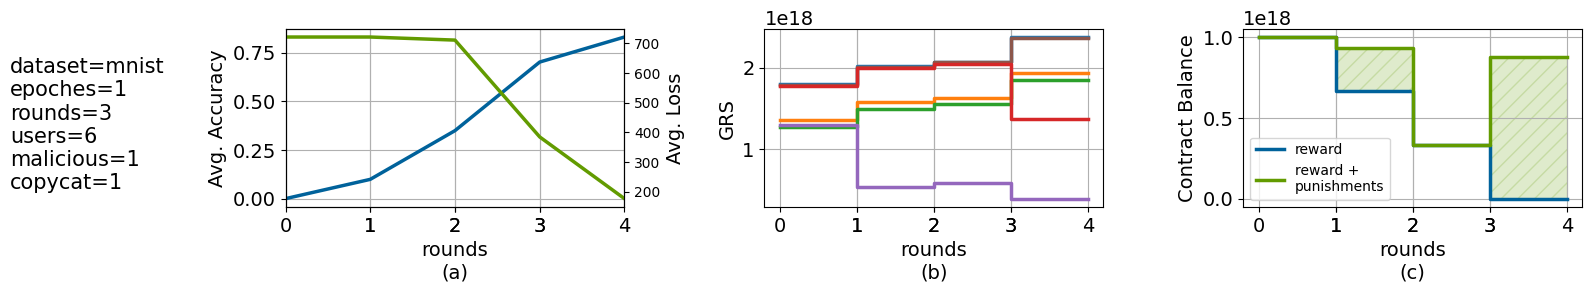

In [9]:
model.visualize_simulation()

### Transactions

In [10]:
print("{:<10} - {:^64} -    Gas Used - {}".format("Function", "Transaction Hash", "Success"))
print("------------------------------------------------------------------------------------------")
for f, txhash in model.txHashes:
    r = model.w3.eth.wait_for_transaction_receipt(txhash)
    if r["status"] == 1:
        success = "✅"
    else:
        success = "FAIL"
    
    gas = r["gasUsed"]
    print("{:<10} - {} - {:>9,.0f} -   {}".format(f, txhash, gas, success))

Function   -                         Transaction Hash                         -    Gas Used - Success
------------------------------------------------------------------------------------------
register   - c3c3b5be5d7c2cd9df38a551e9172f8b5635e0a0c41988a3dec8a778f2881d6f -   127,396 -   ✅
register   - d2fc5fbad88a618984f9d96fc744c21863031c3e90654ed36577e2694fe57d4a -   127,396 -   ✅
register   - 76468b898518c330f179b6879c9a3b5b226b241a4a8a8fe257112b99f8b67144 -   127,396 -   ✅
register   - 4a2fdb1a8951e4cb192790cda98feda6466091ef9a87bc478143f808525619dc -   127,396 -   ✅
register   - 86cc065e8ef5c27201d1ed378195f33fe38ba88a91e32a4435db22cc65517104 -   127,396 -   ✅
slot       - 49bace5f034b48c8955376a8808ca4ee2b84189a94c4df7f0ad9cf43838049f8 -    51,185 -   ✅
slot       - 7391060142cb2ff16c4cffc5a55e2b49fd2fcdfc20b1ac85d30f04a16b681c36 -    51,185 -   ✅
slot       - 9f01482a0cd541cd8251004450a1341269701da4b871f7f75e713e5667c4d026 -    51,185 -   ✅
slot       - a24168339a96f6db842bdeb493

### Contracts and Paricipants (Latex format)

In [11]:
print("\\renewcommand{\\arraystretch}{1.3}")
print("\\begin{center}")
print("\\begin{tabular}{ c|c }")

print("\\footnotesize{"+"Contract} &"+" \\footnotesize{Address (Ropsten Testnet)} \\\ ")
print("\\hline")
print("\\footnotesize{"+"Ma-1} & \\footnotesize{"+"{}".format(manager.manager.address)+"} \\\ ")
print("\\footnotesize{"+"Ch-1} & \\footnotesize{"+"{}".format(model.model.address)+"} \\\ ")
for i, p in enumerate(model.pytorch_model.participants[:-1] + \
                           model.pytorch_model.disqualified + \
                           [model.pytorch_model.participants[-1]]):
    print("\\footnotesize{"+"P-{}".format(i+1)+"}  & \\footnotesize{"+"{}".format(p.address)+"} \\\ ")

print("\\end{tabular}")
print("\\end{center}")

\renewcommand{\arraystretch}{1.3}
\begin{center}
\begin{tabular}{ c|c }
\footnotesize{Contract} & \footnotesize{Address (Ropsten Testnet)} \\ 
\hline
\footnotesize{Ma-1} & \footnotesize{0x031376bb01899C27115673F40043c9b19100A665} \\ 
\footnotesize{Ch-1} & \footnotesize{0x4b185Ba495f48A5d4523c906B119d526E7a17DE5} \\ 
\footnotesize{P-1}  & \footnotesize{0x0348988e49e227337B0DbC67873bd4989e399d11} \\ 
\footnotesize{P-2}  & \footnotesize{0x79c11f2c4C0be9bC90702c9AAb34025a3c7b6ea5} \\ 
\footnotesize{P-3}  & \footnotesize{0x7198289ba0621BD902681C925ea0c8E505d40Ae0} \\ 
\footnotesize{P-4}  & \footnotesize{0xee21f211e2510B73CBb88B09582a25afB08996bb} \\ 
\footnotesize{P-5}  & \footnotesize{0xBe944766Aed181fC2E8C6ca5da2a7B191Ad0e87c} \\ 
\footnotesize{P-6}  & \footnotesize{0xfEcE9eBEA018321BCDf5977D0DAD580114722E8e} \\ 
\end{tabular}
\end{center}


### Table with Gas Info (Latex format)

In [12]:
reg = model.gas_register, "register"
fed = model.gas_feedback, "feedback"
clo = model.gas_close, "settle round"
slo = model.gas_slot, "reserve slot"
wei = model.gas_weights, "provide weights**"
dep = manager.gas_deploy, "deployment"
dep = manager.gas_deploy, "deployment"
ext = model.gas_exit, "exit"

tot  = 0
tot2 = 0

print("\\begin{tabular}{ c|c|c }\n\hline\nFunction & Gas Amount & Gas Costs*\\\ \n\hline")
for i, f in [reg,slo,wei,fed,clo]:
    print("{} & {:,.0f} & {:.5f} ETH \\\ ".format(f, sum(i)/len(i), sum(i)/len(i) * 20e9 / 1e18 ))
    tot += sum(i)/len(i)
    if i != clo[0]:
            tot2 += sum(i)/len(i)
        
print("\hline\n\hline")
print("complete round & {:,.0f} & {:.5f} ETH \\\ ".format(tot, tot * 20e9 / 1e18))
print("\hline\n\end{tabular}")

\begin{tabular}{ c|c|c }
\hline
Function & Gas Amount & Gas Costs*\\ 
\hline
register & 127,396 & 0.00255 ETH \\ 
reserve slot & 51,184 & 0.00102 ETH \\ 
provide weights** & 60,732 & 0.00121 ETH \\ 
feedback & 279,596 & 0.00559 ETH \\ 
settle round & 552,854 & 0.01106 ETH \\ 
\hline
\hline
complete round & 1,071,762 & 0.02144 ETH \\ 
\hline
\end{tabular}
